# Exercise 8

## Fourier Analysis of Images

In [34]:
%pylab inline
import scipy.misc
import scipy.ndimage
import cv2

Populating the interactive namespace from numpy and matplotlib


C:\Users\Schirrmacher\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['fft']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In this task, we want to learn something about the Fourier Analysis of images.

Let's create a $64\times64$ pixel image of a cosine with a frequency of $4\,\mathrm{Hz}$ in $x$-direction.

In [35]:
N = 64
x, y = np.meshgrid(linspace(0, N-1, N), linspace(0, N-1, N))

In [36]:
img_x = 0.5 * (cos(2 * pi * 4.0 * x / N) + 1)

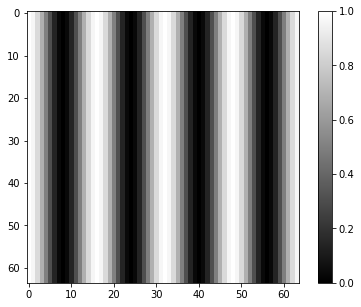

In [37]:
figure(figsize(7, 5))
plt.imshow(img_x, 'gray'), plt.colorbar();

### Task:
Calculate the Fourier Analysis of the image. Use np.fft.fftshift() in combination with np.fft.fft2().

Show the image and the magnitude spectrum.

In [38]:
# Calculating the DFT and shifting the image mean (DC value) to the image center 
fft = np.fft.fftshift(np.fft.fft2(img_x))
# Result is complex - Take absolute value
# The further the distance is to the center the smaller the values are. 
# Most time all values ecept the center aren't visible anymore.
# This can be remedied by applying a logarithmic scaling
m_spec = 20 * np.log(1 +np.abs(fft))

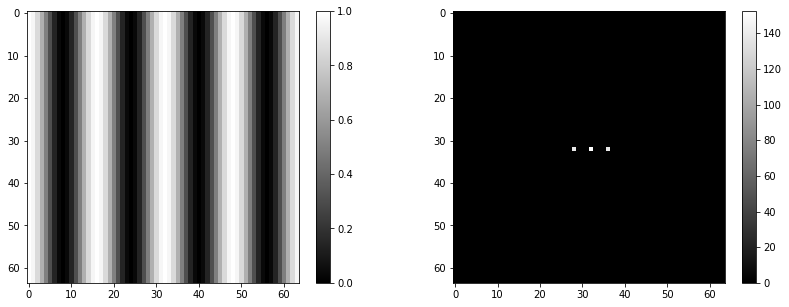

In [39]:
figure(figsize(14, 5))
plt.subplot(1, 2, 1), plt.imshow(img_x, 'gray'), plt.colorbar()
plt.subplot(1, 2, 2), plt.imshow(m_spec, 'gray'), plt.colorbar();

No, we create a second $64\times64$ pixel image of a cosine with a frequency of $16\,\mathrm{Hz}$ in y-direction.

Do the Fourier Analysis again.

In [40]:
img_y = 0.5 * (cos(2 * pi * 16.0 * y / N) + 1)

In [41]:
fft = np.fft.fftshift(np.fft.fft2(img_y))
m_spec = 20 * np.log(1 + np.abs(fft))

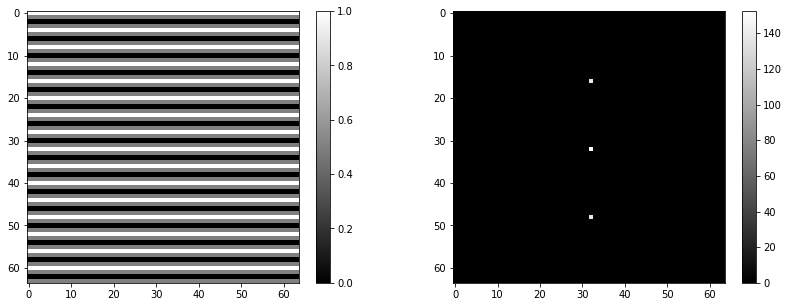

In [42]:
figure(figsize(14, 5))
plt.subplot(1, 2, 1), plt.imshow(img_y, 'gray'), plt.colorbar()
plt.subplot(1, 2, 2), plt.imshow(m_spec, 'gray'), plt.colorbar();

Next, we combine the image two images and analyze the combination.

In [43]:
img_combined = 0.5*(img_x + img_y)

In [44]:
fft = np.fft.fftshift(np.fft.fft2(img_combined))
m_spec = 20 * np.log(1 + np.abs(fft))

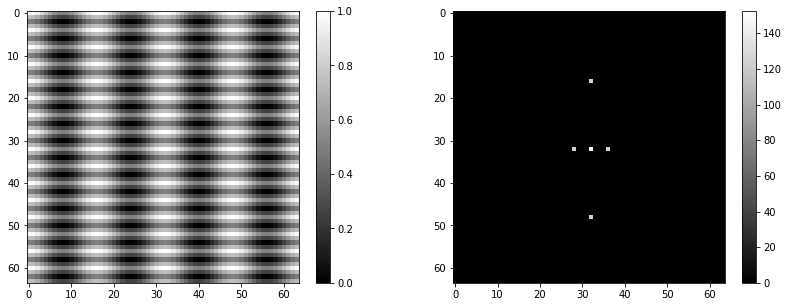

In [45]:
figure(figsize(14, 5))
plt.subplot(1, 2, 1), plt.imshow(img_combined, 'gray'), plt.colorbar()
plt.subplot(1, 2, 2), plt.imshow(m_spec, 'gray'), plt.colorbar();

We rotate the derived image by 45 degrees and analyze this.

In [46]:
img_rot = scipy.ndimage.interpolation.rotate(img_combined,45)
img_rot = img_rot[24:66, 24:66]

In [47]:
fft5 = np.fft.fftshift(np.fft.fft2(img_rot))
m_spec= 20 * np.log(1 + np.abs(fft5))

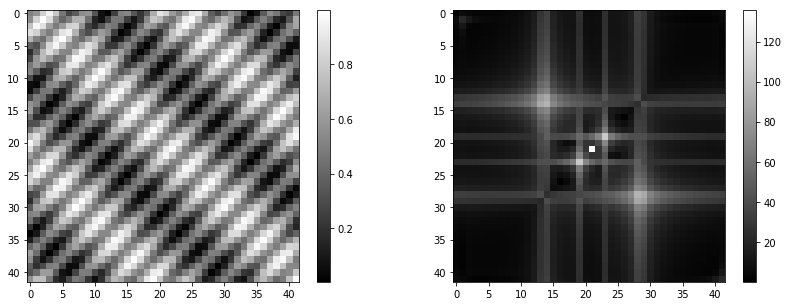

In [48]:
figure(figsize(14, 5))
plt.subplot(1, 2, 1), plt.imshow(img_rot, 'gray'), plt.colorbar()
plt.subplot(1, 2, 2), plt.imshow(m_spec, 'gray'), plt.colorbar();

### Periodic Summation
We create an image that consists of four times the rotated image.

In [49]:
img = np.zeros((84, 84))
img[0:42, 0:42] = img_rot
img[42:84, 42:84] = img_rot
img[0:42, 42:84] = img_rot
img[42:84, 0:42] = img_rot

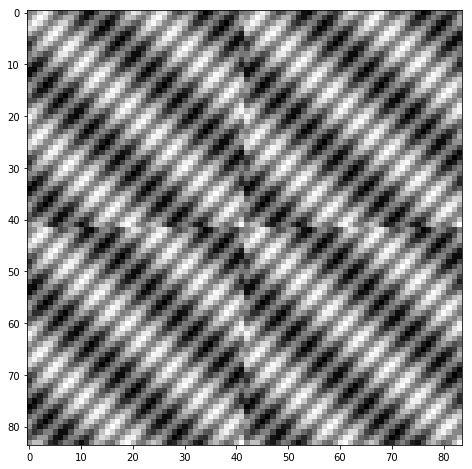

In [50]:
figure(figsize(8, 8))
plt.imshow(img, 'gray');

Analyze the image with FFT.

## Windowing

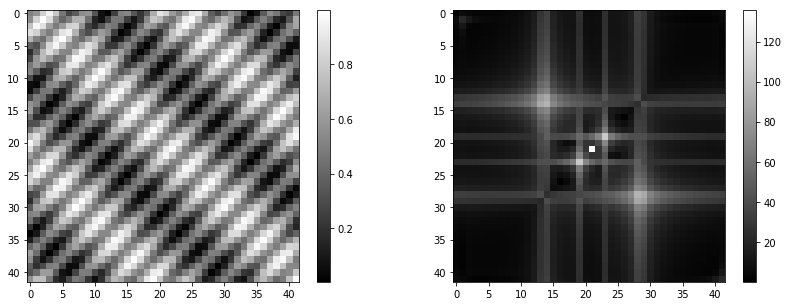

In [51]:
fft = np.fft.fftshift(np.fft.fft2(img_rot))
m_spec = 20 * np.log(1 + np.abs(fft))

figure(figsize(14, 5))
plt.subplot(1, 2, 1), plt.imshow(img_rot, 'gray'), plt.colorbar()
plt.subplot(1, 2, 2), plt.imshow(m_spec, 'gray'), plt.colorbar();

Within in the next steps, we create a Bartlett, a Hamming and a Hanning window and display them.

In [52]:
window_image = img_rot
height, width = np.shape(window_image)

In [53]:
w = np.bartlett(width)
wy, wx = np.meshgrid(w, w)
w_bartlett = wy * wx

In [54]:
w = np.hamming(width)
wy, wx = np.meshgrid(w, w)
w_hamming = wy * wx

In [55]:
w = np.hanning(width)
wy, wx = np.meshgrid(w, w)
w_hanning = wy * wx

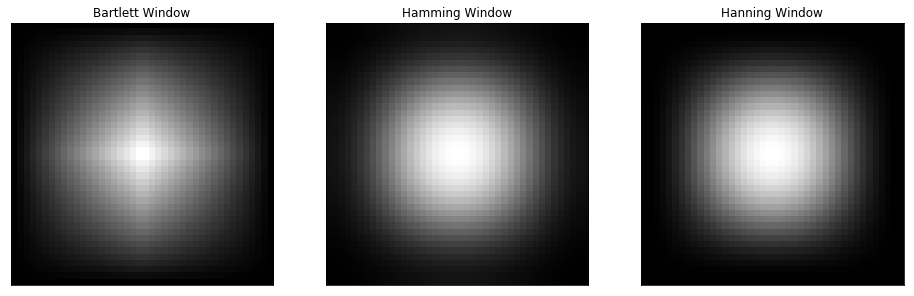

In [56]:
figure(figsize(16, 8))
f1 = plt.subplot(1, 3, 1)
plt.xticks([]),plt.yticks([])
plt.imshow(w_bartlett, 'gray');
f1.set_title('Bartlett Window');
f2 = plt.subplot(1, 3, 2)
plt.xticks([]),plt.yticks([])
plt.imshow(w_hamming, 'gray');
f2.set_title('Hamming Window');
f3 = plt.subplot(1, 3, 3)
plt.xticks([]),plt.yticks([])
plt.imshow(w_hanning, 'gray');
f3.set_title('Hanning Window');

Multiply the windows with the combined image and plot them.

In [57]:
img_bartlett = w_bartlett * window_image
img_hamming = w_hamming * window_image
img_hanning = w_hanning * window_image

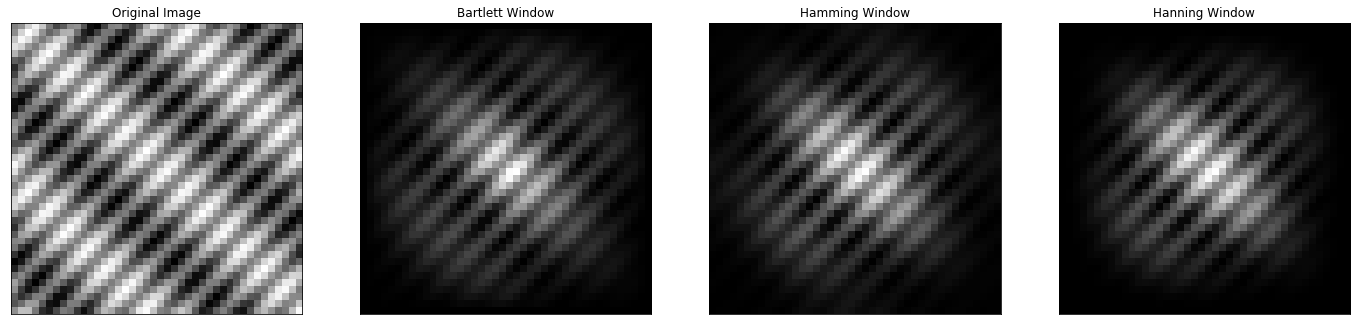

In [58]:
figure(figsize(24, 16))
f1 = plt.subplot(1, 4, 1)
plt.xticks([]),plt.yticks([])
plt.imshow(window_image, 'gray');
f1.set_title('Original Image');
f2 = plt.subplot(1, 4, 2)
plt.xticks([]),plt.yticks([])
plt.imshow(img_bartlett, 'gray');
f2.set_title('Bartlett Window');
f3 = plt.subplot(1, 4, 3)
plt.xticks([]),plt.yticks([])
plt.imshow(img_hamming, 'gray');
f3.set_title('Hamming Window');
f4 = plt.subplot(1, 4, 4)
plt.xticks([]),plt.yticks([])
plt.imshow(img_hanning, 'gray');
f4.set_title('Hanning Window');

Perform the fourier transforms and plot them.

In [59]:
fft_img = np.fft.fftshift(np.fft.fft2(window_image))
fft_bartlett = np.fft.fftshift(np.fft.fft2(img_bartlett))
fft_hamming = np.fft.fftshift(np.fft.fft2(img_hamming))
fft_hanning = np.fft.fftshift(np.fft.fft2(img_hanning))

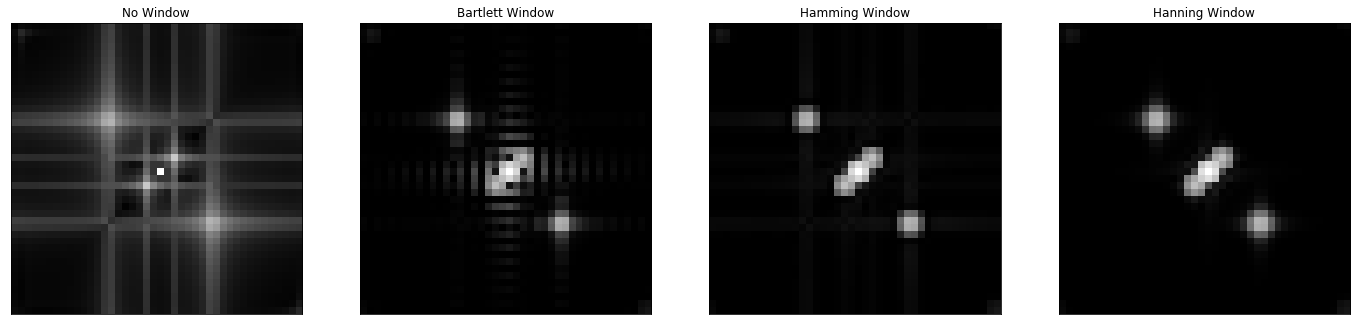

In [60]:
figure(figsize(24, 16))
f1 = plt.subplot(1, 4, 1)
plt.xticks([]),plt.yticks([])
plt.imshow(np.log(np.abs(fft_img) + 1.0), 'gray');
f1.set_title('No Window');
f2 = plt.subplot(1, 4, 2)
plt.xticks([]),plt.yticks([])
plt.imshow(np.log(np.abs(fft_bartlett) + 1.0), 'gray');
f2.set_title('Bartlett Window');
f3 = plt.subplot(1, 4, 3)
plt.xticks([]),plt.yticks([])
plt.imshow(np.log(np.abs(fft_hamming) + 1.0), 'gray');
f3.set_title('Hamming Window');
f4 = plt.subplot(1, 4, 4)
plt.xticks([]),plt.yticks([])
plt.imshow(np.log(np.abs(fft_hanning) + 1.0), 'gray');
f4.set_title('Hanning Window');

Now, we want to remove certain frequencies. Therefore we have to delete the white dots in $x$- or $y$-direction. 
The following mask function deletes certain areas depending on band_radius and a center offset.

In [61]:
def mask(img):
    
    # find image center
    center_x = np.shape(img)[1] / 2 + 1
    center_y = np.shape(img)[0] / 2 + 1
    
    band_radius = 5
    center_offset = 4

    # set frequencies in band to 0
    for i in range(0, np.shape(img)[0]):
        for j in range(0, np.shape(img)[1]):
            if np.abs(j - center_x) <= band_radius and np.abs(i - center_y) > center_offset:
                img[i, j] = 0
            if np.abs(i - center_x) <= band_radius and np.abs(j - center_y) > center_offset:
                img[i, j] = 0
    
    return img

Mask the original and the windowed images.

In [62]:
fft_img = mask(fft_img)
fft_bartlett = mask(fft_bartlett)
fft_hamming = mask(fft_hamming)
fft_hanning = mask(fft_hanning)

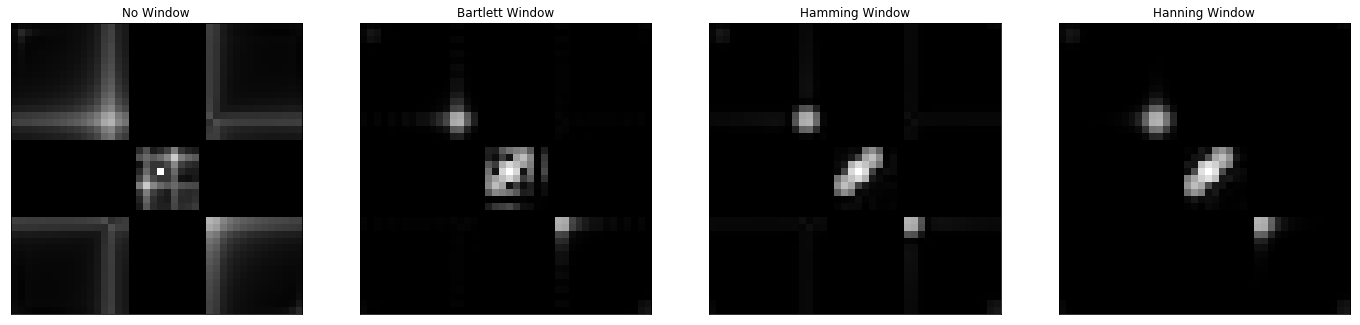

In [63]:
figure(figsize(24, 16))
f1 = plt.subplot(1, 4, 1)
plt.xticks([]),plt.yticks([])
plt.imshow(np.log(np.abs(fft_img) + 1.0), 'gray');
f1.set_title('No Window');
f2 = plt.subplot(1, 4, 2)
plt.xticks([]),plt.yticks([])
plt.imshow(np.log(np.abs(fft_bartlett) + 1.0), 'gray');
f2.set_title('Bartlett Window');
f3 = plt.subplot(1, 4, 3)
plt.xticks([]),plt.yticks([])
plt.imshow(np.log(np.abs(fft_hamming) + 1.0), 'gray');
f3.set_title('Hamming Window');
f4 = plt.subplot(1, 4, 4)
plt.xticks([]),plt.yticks([])
plt.imshow(np.log(np.abs(fft_hanning) + 1.0), 'gray');
f4.set_title('Hanning Window');

Transform the result back from the frequency domain (np.real(np.fft.ifft2(np.fft.ifftshift())). 

Divide by the the windows to remove the dark border. Add an epsilon to prevent divisons by 0
$Output = IFFT(fft_image)/(window_image+eps)

In [64]:
eps = 0.1

In [65]:
img_filtered = np.real(np.fft.ifft2(np.fft.ifftshift(fft_img)))
img_filtered_bartlett = np.real(np.fft.ifft2(np.fft.ifftshift(fft_bartlett))) / (w_bartlett + eps)
img_filtered_hamming = np.real(np.fft.ifft2(np.fft.ifftshift(fft_hamming))) / (w_hamming + eps)
img_filtered_hanning = np.real(np.fft.ifft2(np.fft.ifftshift(fft_hanning))) / (w_hanning + eps)

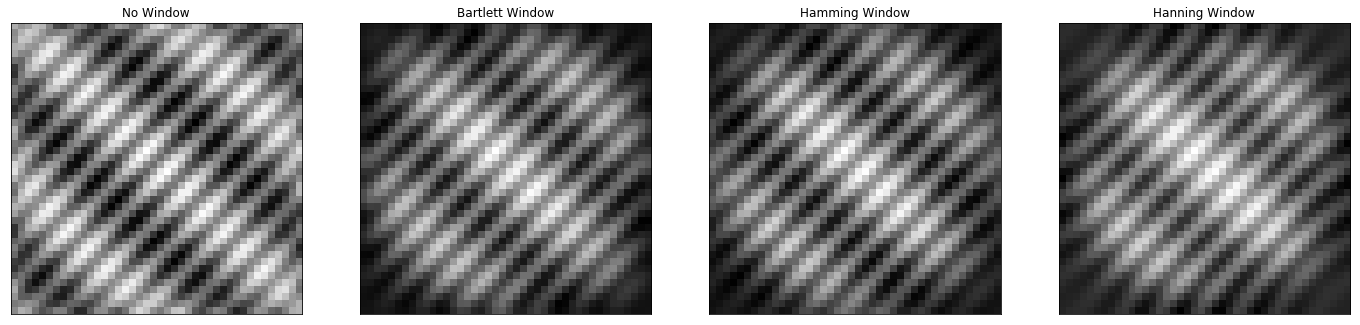

In [66]:
figure(figsize(24, 16))
f1 = plt.subplot(1, 4, 1)
plt.xticks([]),plt.yticks([])
plt.imshow(img_filtered, 'gray');
f1.set_title('No Window');
f2 = plt.subplot(1, 4, 2)
plt.xticks([]),plt.yticks([])
plt.imshow(img_filtered_bartlett, 'gray');
f2.set_title('Bartlett Window');
f3 = plt.subplot(1, 4, 3)
plt.xticks([]),plt.yticks([])
plt.imshow(img_filtered_hamming, 'gray');
f3.set_title('Hamming Window');
f4 = plt.subplot(1, 4, 4)
plt.xticks([]),plt.yticks([])
plt.imshow(img_filtered_hanning, 'gray');
f4.set_title('Hanning Window');